In [1]:
# importing libraries

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
imdb_df = pd.read_csv('imdb_df.csv')
imdb_df.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43


In [3]:
# Normalize genre strings
imdb_df['genres'] = imdb_df['genres'].str.strip().str.lower()

# Tokenize genres
imdb_df['genres_list'] = imdb_df['genres'].str.split(',')

# Expand genres into separate columns for one-hot encoding
genres_expanded = imdb_df['genres_list'].explode().unique()
for genre in genres_expanded:
    imdb_df[genre] = imdb_df['genres_list'].apply(lambda x: 1 if genre in x else 0)

# Drop the intermediate columns
df = imdb_df.drop(columns=['genres', 'genres_list'])

df

,movie_id,primary_title,original_title,start_year,runtime_minutes,movie_id.1,averagerating,numvotes,action,crime,...,war,music,sport,western,musical,news,reality-tv,game-show,adult,short
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,tt0063540,7.0,77,1,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,tt0066787,7.2,43,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,tt0069049,6.9,4517,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,tt0100275,6.5,119,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,tt0137204,8.1,263,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,tt9911774,8.4,365,0,0,...,0,0,0,0,0,0,0,0,0,0
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,tt9913056,6.2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,tt9913084,6.2,6,0,0,...,0,0,0,0,0,0,0,0,0,0
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,tt9914286,8.7,136,0,0,...,0,0,0,0,0,0,0,0,0,0


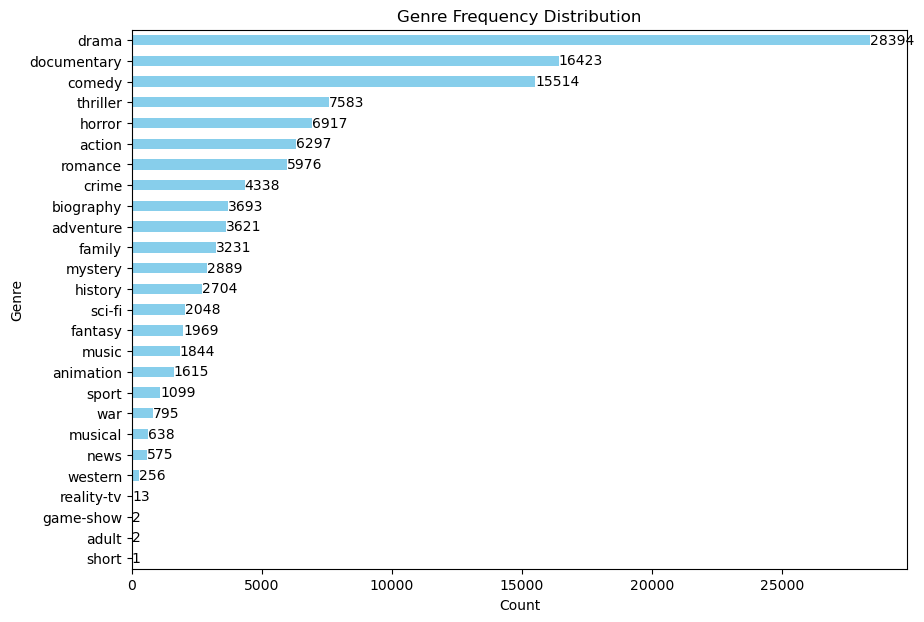

In [4]:
#Frequency count

# Count the frequency of each genre
genre_counts = df[genres_expanded].sum()

# Plot the distribution
plt.figure(figsize=(10, 7))
ax = genre_counts.sort_values().plot(kind='barh', color='skyblue')

# Add count labels next to each bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2, int(width), 
            ha='left', va='center', color='black')

plt.title('Genre Frequency Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


### Genre Combinations
Analyze how different genres frequently appear together. You can use pairwise counts to see which genres often co-occur.

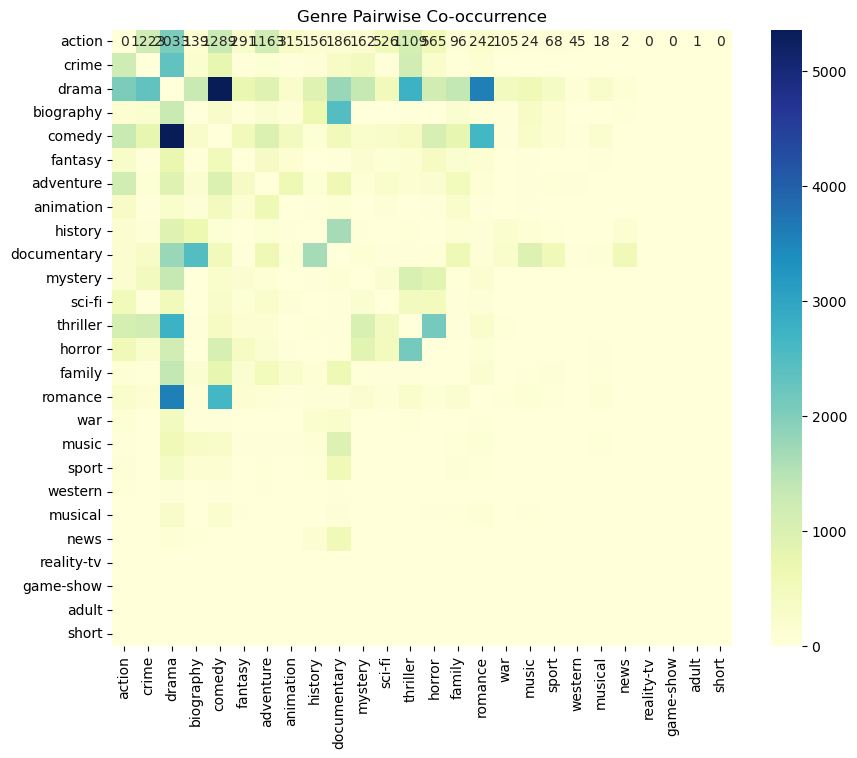

In [5]:
# Create a DataFrame for pairwise genre combinations
from itertools import combinations

# Calculate pairwise genre co-occurrence
genre_pairs = pd.DataFrame(
    index=genres_expanded,
    columns=genres_expanded,
    data=0
)

for genre1, genre2 in combinations(genres_expanded, 2):
    genre_pairs.loc[genre1, genre2] = ((df[genre1] & df[genre2]).sum())
    genre_pairs.loc[genre2, genre1] = genre_pairs.loc[genre1, genre2]

# Plot the pairwise co-occurrence
plt.figure(figsize=(10, 8))
sns.heatmap(genre_pairs, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Genre Pairwise Co-occurrence')
plt.show()


In [6]:
# Table

# Create a DataFrame for pairwise genre combinations
from itertools import combinations

# Calculate pairwise genre co-occurrence
genre_pairs = pd.DataFrame(
    index=genres_expanded,
    columns=genres_expanded,
    data=0
)

for genre1, genre2 in combinations(genres_expanded, 2):
    genre_pairs.loc[genre1, genre2] = ((df[genre1] & df[genre2]).sum())
    genre_pairs.loc[genre2, genre1] = genre_pairs.loc[genre1, genre2]

# Fill diagonal with zeros (genre with itself)
for genre in genres_expanded:
    genre_pairs.loc[genre, genre] = 0

# Print the DataFrame of genre pairwise combinations
print("Pairwise Genre Combinations:")
print(genre_pairs)


Pairwise Genre Combinations:
             action  crime  drama  biography  comedy  fantasy  adventure  \
action            0   1223   2033        139    1289      291       1163   
crime          1223      0   2334        198     779       35        115   
drama          2033   2334      0       1278    5358      731        922   
biography       139    198   1278          0     265       21        183   
comedy         1289    779   5358        265       0      522        999   
fantasy         291     35    731         21     522        0        341   
adventure      1163    115    922        183     999      341          0   
animation       315     30    218         74     445      131        592   
history         156     65    940        679     115       15        106   
documentary     186    319   1779       2471     543       36        620   
mystery         162    455   1342         12     219      162         98   
sci-fi          526     28    542          6     287      1

In [7]:


# Calculate pairwise genre co-occurrence
genre_pairs = pd.DataFrame(
    index=genres_expanded,
    columns=genres_expanded,
    data=0
)

for genre1, genre2 in combinations(genres_expanded, 2):
    genre_pairs.loc[genre1, genre2] = ((df[genre1] & df[genre2]).sum())
    genre_pairs.loc[genre2, genre1] = genre_pairs.loc[genre1, genre2]

# Reset diagonal to zero (self-combinations)
for genre in genres_expanded:
    genre_pairs.loc[genre, genre] = 0

# Melt the DataFrame to long format
genre_pairs_melted = genre_pairs.reset_index().melt(id_vars='index', var_name='Genre2', value_name='Count')
genre_pairs_melted.columns = ['Genre1', 'Genre2', 'Count']

# Remove rows where Count is zero
genre_pairs_melted = genre_pairs_melted[genre_pairs_melted['Count'] > 0]

# Create a column for combinations in the form (Genre1, Genre2)
genre_pairs_melted['Combination'] = genre_pairs_melted.apply(lambda row: f"{row['Genre1']} & {row['Genre2']}", axis=1)

# Select relevant columns and sort by Count
result_table = genre_pairs_melted[['Combination', 'Count']].sort_values(by='Count', ascending=False)

# Print the sorted table
print("Genre Combination Counts:")
print(result_table)


Genre Combination Counts:
             Combination  Count
106       drama & comedy   5358
56        comedy & drama   5358
67       romance & drama   3561
392      drama & romance   3561
64      thriller & drama   2748
..                   ...    ...
201  western & animation      1
75     game-show & drama      1
77         short & drama      1
148      sport & fantasy      1
652        drama & short      1

[480 rows x 2 columns]


In [8]:
import pandas as pd
from itertools import combinations

# Sample DataFrame creation (replace this with your actual DataFrame)
data = {
    'movie_id': ['tt0063540', 'tt0066787'],
    'primary_title': ['Sunghursh', 'One Day Before the Rainy Season'],
    'original_title': ['Sunghursh', 'Ashad Ka Ek Din'],
    'start_year': [2013, 2019],
    'runtime_minutes': [175.0, 114.0],
    'genres': ['Action,Crime,Drama', 'Biography,Drama'],
    'movie_id.1': ['tt0063540', 'tt0066787'],
    'averagerating': [7.0, 7.2],
    'numvotes': [77, 43]
}

df = pd.DataFrame(data)

# Preprocessing the genres
df['genres'] = df['genres'].str.strip().str.lower()
df['genres_list'] = df['genres'].str.split(',')

# Create a DataFrame to store the genre pairs
genre_pairs = pd.DataFrame(columns=['Genre1', 'Genre2', 'MovieID'])

# Iterate through each movie and its genres
for _, row in df.iterrows():
    genres = sorted(row['genres_list'])  # Sort genres to ensure order consistency
    for genre1, genre2 in combinations(genres, 2):
        genre_pairs = genre_pairs.append({'Genre1': genre1, 'Genre2': genre2, 'MovieID': row['movie_id']}, ignore_index=True)

# Count unique occurrences of each combination per movie
genre_pairs_unique = genre_pairs.drop_duplicates(subset=['Genre1', 'Genre2', 'MovieID'])

# Count the occurrences of each genre combination
genre_combinations_counts = genre_pairs_unique.groupby(['Genre1', 'Genre2']).size().reset_index(name='Count')

# Create a Combination column
genre_combinations_counts['Combination'] = genre_combinations_counts.apply(lambda row: f"{row['Genre1']} & {row['Genre2']}", axis=1)

# Select relevant columns and sort by Count
result_table = genre_combinations_counts[['Combination', 'Count']].sort_values(by='Count', ascending=False)

# Print the sorted table
print("Genre Combination Counts:")
print(result_table)


AttributeError: 'DataFrame' object has no attribute 'append'

In [9]:
# Normalize genre strings
imdb_df['genres'] = imdb_df['genres'].str.strip().str.lower()

# Tokenize genres
imdb_df['genres_list'] = imdb_df['genres'].str.split(',')

# Create a DataFrame to store genre combinations
genre_combinations = pd.DataFrame(columns=['Combination', 'Count'])

# Generate genre combinations for each movie and count occurrences
combination_counts = {}

for _, row in imdb_df.iterrows():
    genres = sorted(row['genres_list'])  # Sort genres to ensure order consistency
    for r in range(1, len(genres) + 1):
        for combo in combinations(genres, r):
            combo_str = ' & '.join(combo)
            if combo_str in combination_counts:
                combination_counts[combo_str] += 1
            else:
                combination_counts[combo_str] = 1

# Convert the combination counts dictionary to a DataFrame
genre_combinations = pd.DataFrame(list(combination_counts.items()), columns=['Combination', 'Count'])

# Sort by Count in descending order
result_table = genre_combinations.sort_values(by='Count', ascending=False)

# Print the sorted table
print("Genre Combination Counts:")
print(result_table)

Genre Combination Counts:
                          Combination  Count
2                               drama  28394
22                        documentary  16423
9                              comedy  15514
36                           thriller   7583
40                             horror   6917
..                                ...    ...
798             drama & war & western      1
800        adventure & music & sci-fi      1
802        biography & family & sport      1
804  action & animation & documentary      1
966     documentary & family & sci-fi      1

[967 rows x 2 columns]


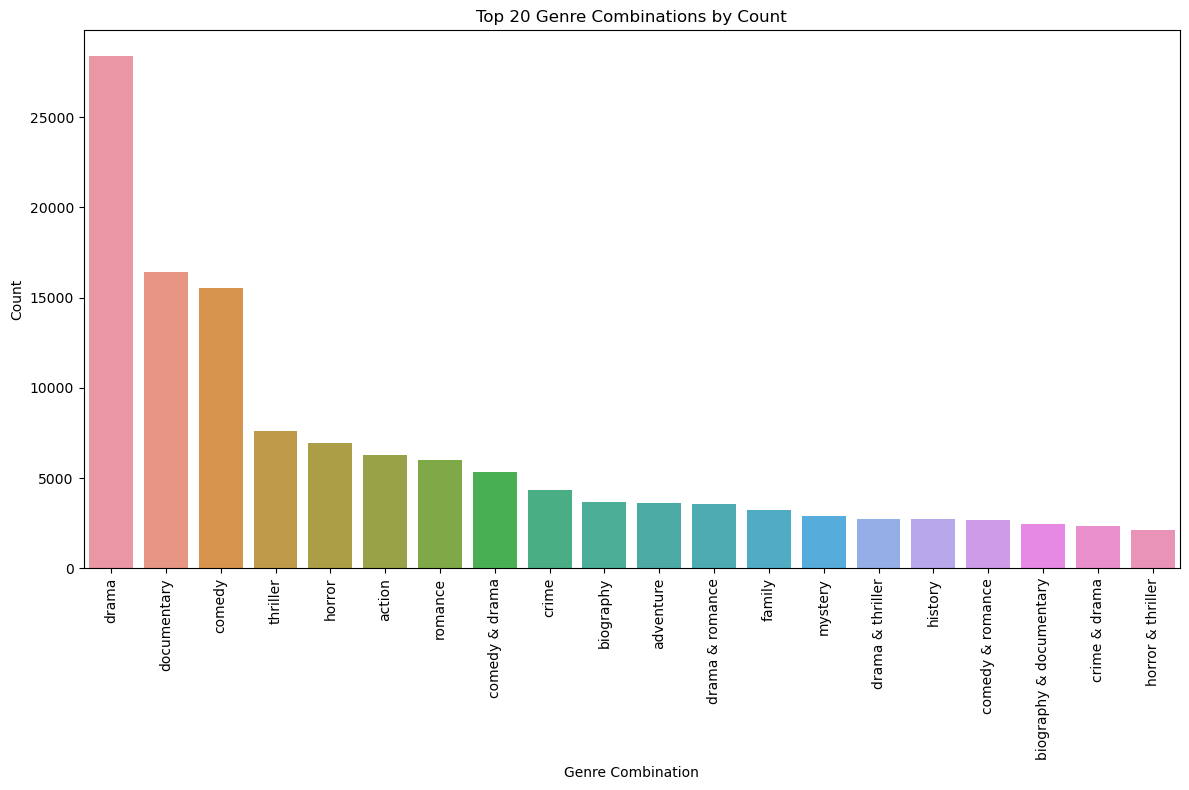

In [24]:
result = pd.DataFrame(result_table)
result = result.head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x= result['Combination'], y = result['Count'])
plt.xticks(rotation=90)
plt.title('Top 20 Genre Combinations by Count')
plt.xlabel('Genre Combination')
plt.ylabel('Count')

# Annotate the bars with the count values
#for index, row in result.iterrows():
#    barplot.text(index, row['Count'], round(row['Count'], 2), color='black', ha="center")

plt.tight_layout()
plt.show()